# PARKINGSON PREDICTION USING ENSEMBLE LEARNING

Ensemble learning is a machine learning technique that involves combining multiple models to improve the overall performance and predictive accuracy. Instead of relying on a single model, ensemble methods leverage the diversity of multiple models to make more robust predictions. There are several popular ensemble learning techniques, including:

Ensemble learning of 4 types:
    Bagging
    Boosting
    Stacking
    blending

# 1. Bagging 2.Boosting 3.Stacking 4.Blending

# Bagging

Bagging, short for Bootstrap Aggregating, is an ensemble learning technique that aims to improve the stability and accuracy of machine learning algorithms. It works by training multiple instances of the same model on different subsets of the training data and then combining their predictions.

Here's how bagging typically works:

In [1]:
#color for printing outputs
class color:
    PURPLE ='\033[95m'
    CYAN = '\033[96m'
    DARKCYAN ='\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW ='\033[93m'
    RED = '\033[91m'
    BOLD ='\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# importing packages and Dataset

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
parkinson=pd.read_csv('Parkinsson disease.csv')
parkinson1=pd.read_csv('Parkinsson disease.csv')

In [4]:
parkinson

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
parkinson.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
parkinson.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
parkinson.drop(columns=['name'], inplace=True)

In [8]:
parkinson.groupby('status').mean() 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [9]:
# parkinson.groupby('status').max()

In [10]:
data_x=parkinson.loc[:, parkinson.columns != 'status' ]
data_y=parkinson['status']

In [11]:
data_x.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [12]:
data_x.values

array([[1.199920e+02, 1.573020e+02, 7.499700e+01, ..., 2.664820e-01,
        2.301442e+00, 2.846540e-01],
       [1.224000e+02, 1.486500e+02, 1.138190e+02, ..., 3.355900e-01,
        2.486855e+00, 3.686740e-01],
       [1.166820e+02, 1.311110e+02, 1.115550e+02, ..., 3.111730e-01,
        2.342259e+00, 3.326340e-01],
       ...,
       [1.746880e+02, 2.400050e+02, 7.428700e+01, ..., 1.584530e-01,
        2.679772e+00, 1.317280e-01],
       [1.987640e+02, 3.969610e+02, 7.490400e+01, ..., 2.074540e-01,
        2.138608e+00, 1.233060e-01],
       [2.142890e+02, 2.602770e+02, 7.797300e+01, ..., 1.906670e-01,
        2.555477e+00, 1.485690e-01]])

In [13]:
pd.DataFrame(data_y)

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


In [14]:
from sklearn.model_selection import train_test_split
TEST_SIZE=0.2
RANDOM_STATE=10

# turn to numpy array
data_x = data_x.values

# create condition(group) array
data_y = data_y.values
    
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, 
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE,stratify=data_y)#shuffle,stratify
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(124, 22) (32, 22) (39, 22)
(124,) (32,) (39,)


Shuffling refers to the randomization of the order of data points in the dataset before splitting it. This randomization helps in preventing any bias that might arise if the dataset has been ordered in a specific way.

Stratification is a technique used to ensure that the distribution of classes in the original dataset is preserved across the split datasets. This is particularly important when dealing with imbalanced datasets,

In [15]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,124.445,135.069,117.495,0.00431,0.00003,0.00141,0.00167,0.00422,0.02184,0.197,...,0.01685,0.03724,0.00479,25.135,0.553134,0.775933,-6.650471,0.254498,1.840198,0.103561
1,154.003,160.267,128.621,0.00183,0.00001,0.00076,0.00100,0.00229,0.01030,0.094,...,0.00871,0.01406,0.00243,28.409,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
2,208.083,253.792,91.802,0.00757,0.00004,0.00428,0.00428,0.01285,0.06725,0.571,...,0.04464,0.12047,0.04238,15.648,0.606344,0.665945,-5.410336,0.288917,2.665133,0.231723
3,110.568,125.394,106.821,0.00462,0.00004,0.00226,0.00280,0.00677,0.02199,0.197,...,0.01636,0.03852,0.00420,25.820,0.429484,0.816340,-5.391029,0.250572,1.777901,0.232744
4,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.01351,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,116.848,217.552,99.503,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.163,...,0.01756,0.02429,0.01179,22.085,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
120,139.173,179.139,76.556,0.00390,0.00003,0.00165,0.00208,0.00496,0.01642,0.154,...,0.01797,0.02184,0.01041,24.889,0.430166,0.665833,-5.660217,0.254989,2.519422,0.199889
121,156.405,189.398,142.822,0.00768,0.00005,0.00372,0.00399,0.01116,0.03995,0.348,...,0.04310,0.05164,0.03365,17.153,0.649554,0.686080,-4.554466,0.340176,2.856676,0.322111
122,128.001,138.052,122.080,0.00436,0.00003,0.00137,0.00166,0.00411,0.02297,0.210,...,0.01677,0.03969,0.00481,24.692,0.459766,0.766204,-7.072419,0.220434,1.972297,0.119308


In [16]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,148.090,162.824,67.343,0.00762,0.000050,0.00467,0.00354,0.01400,0.05428,0.497,...,0.03635,0.10070,0.02431,21.718,0.487407,0.727313,-6.261141,0.120956,2.137075,0.141958
1,117.963,134.209,100.757,0.01813,0.000150,0.01117,0.00718,0.03351,0.04912,0.438,...,0.02916,0.07830,0.10748,19.075,0.630547,0.646786,-3.444478,0.303214,2.964568,0.261305
2,243.439,250.912,232.435,0.00210,0.000009,0.00109,0.00137,0.00327,0.01419,0.126,...,0.01033,0.02330,0.00454,25.368,0.438296,0.635285,-7.057869,0.091608,2.330716,0.091470
3,119.056,125.213,86.795,0.00346,0.000030,0.00169,0.00170,0.00508,0.01201,0.106,...,0.00915,0.01898,0.00903,23.389,0.470972,0.721308,-5.436135,0.254909,2.516320,0.232209
4,119.031,127.533,109.216,0.00440,0.000040,0.00214,0.00192,0.00641,0.01033,0.098,...,0.00811,0.01614,0.01724,26.842,0.457541,0.699787,-6.890021,0.152941,2.328513,0.112856
5,150.258,154.609,75.349,0.00248,0.000020,0.00105,0.00136,0.00315,0.01131,0.107,...,0.01009,0.01567,0.00495,26.759,0.296888,0.722356,-6.878393,0.089267,2.004055,0.113942
6,112.150,131.669,97.527,0.00519,0.000050,0.00291,0.00284,0.00873,0.01756,0.155,...,0.01363,0.02902,0.01435,21.219,0.557045,0.673086,-5.617124,0.184896,1.871871,0.212386
7,178.222,202.450,141.047,0.00321,0.000020,0.00163,0.00194,0.00488,0.03759,0.327,...,0.02784,0.06219,0.03151,15.924,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614
8,142.167,217.455,83.159,0.00369,0.000030,0.00157,0.00203,0.00471,0.01503,0.126,...,0.01359,0.02316,0.00839,25.175,0.565924,0.658245,-5.340115,0.210185,2.205546,0.234589
9,176.824,215.293,83.961,0.00460,0.000030,0.00209,0.00221,0.00628,0.01169,0.117,...,0.01104,0.01603,0.01161,27.166,0.400088,0.656182,-4.711007,0.281618,2.655744,0.234809


In [17]:
pd.DataFrame(y_train)

,0
0,0
1,1
2,1
3,1
4,1
...,...
119,0
120,1
121,1
122,0


In [18]:
pd.DataFrame(y_test)

,0
0,1
1,1
2,0
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [19]:
pd.DataFrame(X_val)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,129.336,139.867,118.604,0.00490,0.00004,0.00165,0.00183,0.00495,0.02498,0.228,...,0.01947,0.04188,0.00484,25.429,0.420383,0.785714,-6.836811,0.269866,2.223719,0.147491
1,187.733,202.324,173.015,0.00316,0.00002,0.00168,0.00182,0.00504,0.01663,0.151,...,0.01366,0.02488,0.00265,26.310,0.396793,0.758324,-6.006647,0.266892,2.382544,0.160691
2,122.336,142.369,94.794,0.00727,0.00006,0.00415,0.00339,0.01246,0.02293,0.223,...,0.01771,0.03615,0.03191,22.953,0.611679,0.623731,-5.435100,0.230532,2.699645,0.220546
3,119.100,128.442,88.833,0.00692,0.00006,0.00393,0.00300,0.01179,0.02682,0.236,...,0.02018,0.04451,0.04611,21.824,0.651680,0.659333,-4.239028,0.175691,2.451130,0.247455
4,202.544,241.350,164.168,0.00254,0.00001,0.00100,0.00133,0.00301,0.02662,0.228,...,0.02006,0.04426,0.01049,20.680,0.497480,0.630409,-6.132663,0.220617,2.576563,0.159777
5,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,0.584,...,0.05174,0.09669,0.11843,15.060,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
6,148.790,158.359,138.990,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.142,...,0.01309,0.02518,0.00488,24.412,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
7,200.714,223.982,89.686,0.00621,0.00003,0.00371,0.00337,0.01112,0.02286,0.207,...,0.01852,0.03576,0.00704,23.239,0.436084,0.727863,-5.258320,0.256454,2.550961,0.232520
8,138.145,197.238,81.114,0.00544,0.00004,0.00294,0.00327,0.00883,0.02791,0.246,...,0.02259,0.04451,0.01794,18.178,0.623209,0.738245,-5.540351,0.087165,1.821297,0.214075
9,159.116,168.913,144.811,0.00342,0.00002,0.00178,0.00184,0.00535,0.03381,0.307,...,0.02809,0.05417,0.00852,22.663,0.366329,0.693429,-6.417440,0.194627,2.473239,0.151709


In [20]:
pd.DataFrame(y_val)

,0
0,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [21]:
%%time 
#Measures the execution time of the cell's code.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler#scaling
from sklearn.svm import SVC# used classification and regression tasks
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

pipe_svc= Pipeline([('scl',StandardScaler()),#it is a preprocessing step that standardizes features by removing the mean and scaling to unit variance
                   ('pca',PCA(n_components=0.08,random_state=RANDOM_STATE)),# it reduces the dimensionality of the data while retaining the most important features.
                   ('clf',SVC(kernel='linear',random_state=RANDOM_STATE))])#find a hyperplane that best separates the classes in the feature space.
bag =  BaggingClassifier(base_estimator=pipe_svc,#the individual learning algorithms or models that are combined to form the ensemble
                        n_estimators=14,#will train 14 different pipe_svc pipelines.
                        max_features=0.5,#estimators will train on random 50% OF FEATURE
                        max_samples=0.5,#estimators will train on random 50% OF DATA(less)
                        bootstrap=True,#The samples are drawn with replacement.
                        bootstrap_features=True,#The features are drawn with replacement.
                        oob_score=True,#The out-of-bag samples are used to estimate the generalization error.
                        warm_start=False,#The base estimators are not reused from previous calls.
                        n_jobs=-1,#All available CPU cores are used for training.
                        random_state=RANDOM_STATE)#This ensures reproducibility of the results.
bag.fit(X_train,y_train)

C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


CPU times: total: 78.1 ms
Wall time: 3.59 s


BaggingClassifier(base_estimator=Pipeline(steps=[('scl', StandardScaler()),
                                                 ('pca',
                                                  PCA(n_components=0.08,
                                                      random_state=10)),
                                                 ('clf',
                                                  SVC(kernel='linear',
                                                      random_state=10))]),
                  bootstrap_features=True, max_features=0.5, max_samples=0.5,
                  n_estimators=14, n_jobs=-1, oob_score=True, random_state=10)

Pipelines are useful for encapsulating multiple preprocessing steps and a final estimator (model) into a single object.

Ensemble methods combine multiple base estimators to improve generalizability and robustness over a single estimator

PCA is commonly used to reduce the number of features while retaining most of the variance in the data.

In [22]:
y_pred=bag.predict(X_val)

In [23]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

ACCURACY

In [24]:
display(pd.DataFrame(classification_report(y_val, y_pred , output_dict =True)))

,0,1,accuracy,macro avg,weighted avg
precision,0.500000,0.857143,0.8125,0.678571,0.790179
recall,0.333333,0.923077,0.8125,0.628205,0.812500
f1-score,0.400000,0.888889,0.8125,0.644444,0.797222
support,6.000000,26.000000,0.8125,32.000000,32.000000


In [25]:
bag.oob_score_

0.8225806451612904

In [26]:
from imblearn.ensemble import BalancedBaggingClassifier

bal_bag = BalancedBaggingClassifier(estimator=pipe_svc, 
                                n_estimators=21, 
                                max_samples=0.25, 
                                max_features=0.5, 
                                bootstrap=True, 
                                bootstrap_features=True, 
                                oob_score=True, 
                                warm_start=False, 
                                sampling_strategy ='majority', 
                                replacement=True, 
                                n_jobs=-1, 
                                random_state=RANDOM_STATE)
bal_bag.fit(X_train, y_train)
y_pred = bal_bag.predict(X_val)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [27]:
display(pd.DataFrame(classification_report(y_val, y_pred , output_dict =True)))

,0,1,accuracy,macro avg,weighted avg
precision,0.285714,0.888889,0.625,0.587302,0.775794
recall,0.666667,0.615385,0.625,0.641026,0.625000
f1-score,0.400000,0.727273,0.625,0.563636,0.665909
support,6.000000,26.000000,0.625,32.000000,32.000000


# RANDOM FOREST

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(criterion='gini',
                             n_estimators=100,
                             max_features='sqrt',
                             class_weight='balanced',
                             random_state=RANDOM_STATE,
                             n_jobs=-1)#verbose,ccp alpha..
forest.fit(X_train,y_train)
y_pred=forest.predict(X_val)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
display(pd.DataFrame(classification_report(y_val,y_pred,output_dict=True)))

,0,1,accuracy,macro avg,weighted avg
precision,0.75,0.892857,0.875,0.821429,0.866071
recall,0.50,0.961538,0.875,0.730769,0.875000
f1-score,0.60,0.925926,0.875,0.762963,0.864815
support,6.00,26.000000,0.875,32.000000,32.000000


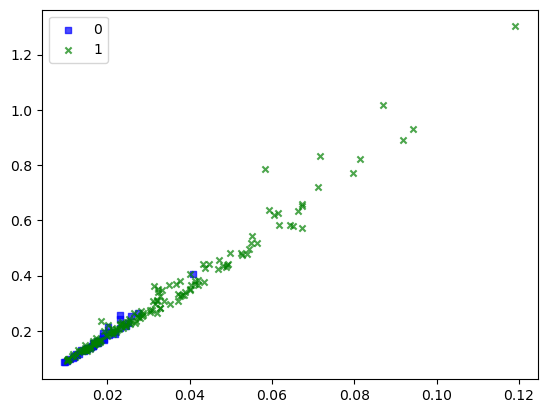

In [30]:
from mlxtend.plotting import category_scatter

x_axis_label='MDVP:Shimmer'
y_axis_label='MDVP:Shimmer(dB)'

reduced_features_reset =parkinson1.reset_index()

fig= category_scatter(x=x_axis_label,y=y_axis_label,label_col='status',
                     data=reduced_features_reset)

feature_list=list(parkinson.columns)
two_features_data=parkinson.iloc[:,[feature_list.index(x_axis_label),feature_list.index(y_axis_label)]]

Tree


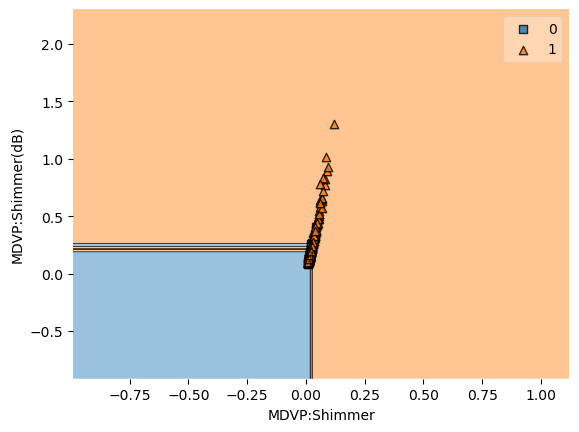

Forest


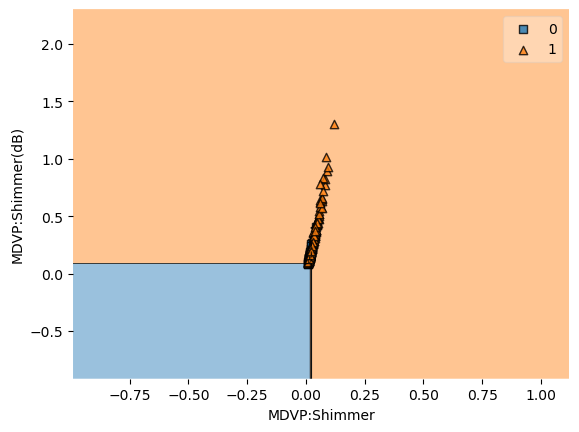

In [31]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(criterion='gini',
                             class_weight = 'balanced',
                             random_state=RANDOM_STATE)
tree_dict = {
    'Tree' : tree,
    'Forest' : forest
}

for classifier_name in tree_dict:
    tree_dict[classifier_name].fit(two_features_data.values,reduced_features_reset['status'].values)
    
    plot_decision_regions(two_features_data.values,
                        reduced_features_reset['status'].values,
                        clf= tree_dict[classifier_name])
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    
    print(color.BOLD+color.UNDERLINE+classifier_name+color.END)
    plt.show()

EXTRA TREES

In [32]:
from sklearn.ensemble import ExtraTreesClassifier

#create a forest Classifier

ETSC =ExtraTreesClassifier(criterion='gini',
                          n_estimators=1000,
                          max_features='sqrt',
                          class_weight = 'balanced',
                          random_state =RANDOM_STATE,
                          n_jobs=-1)

ETSC.fit(X_train,y_train)

y_pred =ETSC.predict(X_val)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
display(pd.DataFrame(classification_report(y_val,y_pred,output_dict=True)))

,0,1,accuracy,macro avg,weighted avg
precision,0.75,0.892857,0.875,0.821429,0.866071
recall,0.50,0.961538,0.875,0.730769,0.875000
f1-score,0.60,0.925926,0.875,0.762963,0.864815
support,6.00,26.000000,0.875,32.000000,32.000000


BALANCED RANDOM FOREST

In [34]:
from imblearn.ensemble import BalancedRandomForestClassifier

bal_forest= BalancedRandomForestClassifier(criterion ='gini',
                                         max_features=100,
                                         random_state=RANDOM_STATE,
                                         n_jobs=-1)

bal_forest.fit(X_train,y_train)

y_pred = bal_forest.predict(X_val)
y_pred

C:\Users\Shuhaib\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Shuhaib\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Shuhaib\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [35]:
display(pd.DataFrame(classification_report(y_val,y_pred,output_dict=True)))

,0,1,accuracy,macro avg,weighted avg
precision,0.400000,0.909091,0.75,0.654545,0.813636
recall,0.666667,0.769231,0.75,0.717949,0.750000
f1-score,0.500000,0.833333,0.75,0.666667,0.770833
support,6.000000,26.000000,0.75,32.000000,32.000000


MAJORITY VOTING

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree  import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.decomposition import PCA
import timeit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,make_scorer

clf1=Pipeline([('scl',StandardScaler()),
              ('clf',SVC(kernel='rbf',
                        gamma='auto',
                        random_state=RANDOM_STATE,
                        probability =True))])

clf2=Pipeline([('scl',StandardScaler()),
              ('clf',LogisticRegression(solver='liblinear',
                                       random_state=RANDOM_STATE))])

clf3 = DecisionTreeClassifier(random_state=RANDOM_STATE)

clf_labels = ['SVM',# Support Vector Machine
              'LR',# LogisticRegression
              'DT']# Decision Tree

#majority Rule Voting

hard_mv_clf =VotingClassifier(estimators=[(clf_labels[0],clf1),
                                         (clf_labels[1],clf2),
                                         (clf_labels[2],clf3)],
                             voting='hard')
soft_mv_clf = VotingClassifier(estimators=[(clf_labels[0],clf1),
                                           (clf_labels[1],clf2),
                                           (clf_labels[2],clf3)],
                               voting='soft')
clf_labels += ['Hard Majority Voting','Soft Majority Voting']
all_clf =[clf1,clf2,clf3,hard_mv_clf,soft_mv_clf]

print(color.BOLD+color.UNDERLINE+'Validation Scores\n'+color.END)
for clf, label in zip(all_clf, clf_labels):
    start= timeit.default_timer() #Time Stuff

    clf.fit(X_train,y_train)
    
    y_pred =clf.predict(X_val)
    scores =f1_score(y_val, y_pred)
    print(color.BOLD+label+color.END)
    print("SCORE:%0.3f"
         % scores)
    
    #TIME STUFF
    stop = timeit.default_timer()
    print("Run time:", np.round((stop-start)/60,2),"minutes")
    print()

Validation Scores

SVM
SCORE:0.912
Run time: 0.0 minutes

LR
SCORE:0.893
Run time: 0.0 minutes

DT
SCORE:0.760
Run time: 0.0 minutes

Hard Majority Voting
SCORE:0.912
Run time: 0.0 minutes

Soft Majority Voting
SCORE:0.852
Run time: 0.0 minutes



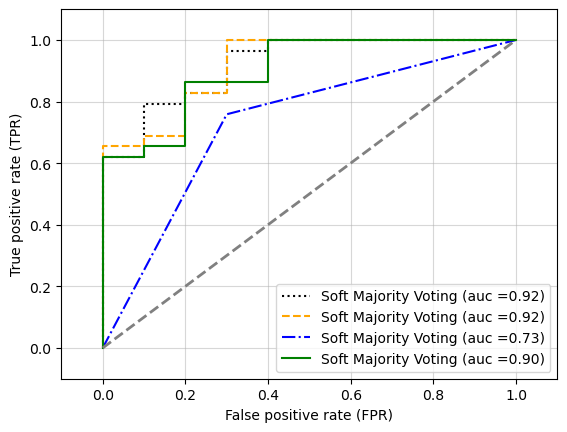

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#remove the hard voting because dosent have preddict proba

del clf_labels[3],all_clf[3]

colors =['black','orange','blue','green']
linestyles = [':','--','-.','-']
for clf,labels,clr,ls in zip (all_clf,clf_labels,colors,linestyles):
    #assuming the label of the positive class is 1
    y_pred =clf.fit(X_train,y_train).predict_proba(X_test)[:,1]
    fpr,tpr,thresholds =roc_curve(y_true=y_test,
                                 y_score=y_pred)
    roc_auc =auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,
            color =clr,
            linestyle=ls,
            label='%s (auc =%0.2f)' %(label,roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],
        linestyle='--',
        color ='gray',
        linewidth=2)

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

#plt.save.fig(os.path.join(IMAGE_DIR, 'Pipeline_rocs.png'), dpi=300) 
plt.show()

# BOOSTING

ADABOOST

In [38]:
%%time 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='gini',
                             max_depth=1,
                             random_state=RANDOM_STATE)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=100,
                         learning_rate=0.1,
                         random_state=RANDOM_STATE)
ada.fit(X_train,y_train)

y_pred =ada.predict(X_val)
y_pred

CPU times: total: 156 ms
Wall time: 202 ms


C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [39]:
display(pd.DataFrame(classification_report(y_val,y_pred,output_dict=True)))

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.838710,0.84375,0.919355,0.868952
recall,0.166667,1.000000,0.84375,0.583333,0.843750
f1-score,0.285714,0.912281,0.84375,0.598997,0.794799
support,6.000000,26.000000,0.84375,32.000000,32.000000


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_reg1 =DecisionTreeClassifier(max_depth=2,random_state=RANDOM_STATE)
tree_reg1.fit(X_train,y_train)

y_train2= y_train -tree_reg1.predict(X_train)
tree_reg2 =DecisionTreeClassifier(max_depth=2,random_state=RANDOM_STATE)
tree_reg2.fit(X_train,y_train)

y_train3= y_train2 -tree_reg1.predict(X_train)
tree_reg3 =DecisionTreeClassifier(max_depth=2,random_state=RANDOM_STATE)
tree_reg3.fit(X_train,y_train)

y_pred =sum(tree.predict(X_val) for tree in(tree_reg1,tree_reg2,tree_reg3))
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 3, 3, 3, 0, 3], dtype=int64)

In [41]:
pd.DataFrame(classification_report(y_val,y_pred,output_dict=True))

C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\metr

,0,1,3,accuracy,macro avg,weighted avg
precision,0.166667,0.0,0.0,0.03125,0.055556,0.03125
recall,0.166667,0.0,0.0,0.03125,0.055556,0.03125
f1-score,0.166667,0.0,0.0,0.03125,0.055556,0.03125
support,6.000000,26.0,0.0,0.03125,32.000000,32.00000


GRADIENT BOOSTING

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

GBC= GradientBoostingClassifier(max_depth =2,n_estimators=3,
                               learning_rate=1.0,random_state=RANDOM_STATE)

GBC.fit(X_train,y_train)
y_pred = GBC.predict(X_val)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [43]:
pd.DataFrame(classification_report(y_val,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.250000,0.821429,0.75,0.535714,0.714286
recall,0.166667,0.884615,0.75,0.525641,0.750000
f1-score,0.200000,0.851852,0.75,0.525926,0.729630
support,6.000000,26.000000,0.75,32.000000,32.000000


In [44]:
from sklearn.metrics import accuracy_score
GBC =GradientBoostingClassifier(max_depth=2 ,n_estimators=30)
GBC.fit(X_train,y_train)

scores =[accuracy_score(y_val,y_pred)
        for y_pred in GBC.staged_predict(X_val)]

bst_n_estimators=np.argmax(scores)+1

GBC_best=GradientBoostingClassifier(max_depth=2,n_estimators = bst_n_estimators,
                              random_state=RANDOM_STATE)

GBC_best.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=1, random_state=10)

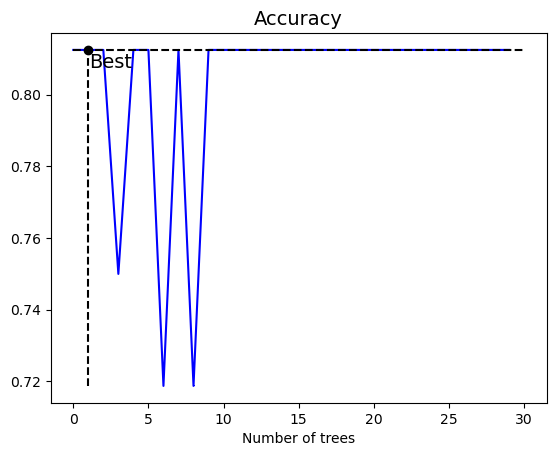

In [45]:
worst_scores=np.min(scores)
best_scores= np.max(scores)

plt.plot(scores,"b,-")
plt.plot([0,30],[best_scores,best_scores],"k--")
plt.plot(bst_n_estimators,best_scores,"ko")
plt.plot([bst_n_estimators,bst_n_estimators],[worst_scores,best_scores],"k--")
plt.text(bst_n_estimators+1.5,best_scores-0.005,"Best",ha="center",fontsize=14)
plt.xlabel("Number of trees")
plt.title("Accuracy",fontsize=14)

plt.show()

In [46]:
gbrt=GradientBoostingClassifier(max_depth=2,warm_start=True,subsample=0.5,random_state=RANDOM_STATE)

max_val_score =float(0)
score_not_going_up =0
for n_estimators in range(1,120):
    gbrt.n_estimators =n_estimators
    gbrt.fit(X_train,y_train)
    y_pred=gbrt.predict(X_val)
    val_score =accuracy_score(y_val,y_pred)
    if val_score >max_val_score:
        max_val_score =val_score
        score_not_going_up =0
    else:
        score_not_going_up += 1
        if score_not_going_up ==5:
            break #early stopping
print("number of estimators:",gbrt.n_estimators)
print("Maximum Accuracy :", max_val_score)

number of estimators: 9
Maximum Accuracy : 0.84375


XGBOOST

In [47]:
from xgboost import XGBClassifier

%timeit 
XGBClassifier(n_estimators=10,random_state=RANDOM_STATE).fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [48]:
%timeit 
AdaBoostClassifier(n_estimators =10, random_state=RANDOM_STATE).fit(X_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=10)

In [49]:
%timeit
GradientBoostingClassifier(n_estimators=10,random_state=RANDOM_STATE).fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10, random_state=10)

In [50]:
XGmodel =XGBClassifier(max_depth =3,
                      learning_rate=0.1,
                      n_estimators=500,
                      n_jobs=-1,
                      booster ='gbtree',
                      random_state=RANDOM_STATE)
XGmodel.fit(X_train,y_train)

y_pred =XGmodel.predict(X_val)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
display(pd.DataFrame(classification_report(y_val,y_pred,output_dict =True)))

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.866667,0.875,0.933333,0.891667
recall,0.333333,1.000000,0.875,0.666667,0.875000
f1-score,0.500000,0.928571,0.875,0.714286,0.848214
support,6.000000,26.000000,0.875,32.000000,32.000000


LIGHTGBM

In [52]:
!pip install lightgbm

In [53]:
from lightgbm import LGBMClassifier
%timeit 
LGBMClassifier(n_estimators=10,random_state=RANDOM_STATE).fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 92, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.741935 -> initscore=1.056053
[LightGBM] [Info] Start training from score 1.056053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMClassifier(n_estimators=10, random_state=10)

In [54]:
LGBM_model=LGBMClassifier(boosting_type='gbdt',
                         max_depth=3,
                         n_estimators=500,
                         random_state=RANDOM_STATE,
                         neg_bagging_fraction=0.5,#for subsampling interictal data
                         n_jpbs= -1,
                         bagging_seed=RANDOM_STATE)
LGBM_model.fit(X_train,y_train)

y_pred=LGBM_model.predict(X_val)
y_pred

[LightGBM] [Warning] Unknown parameter: n_jpbs
[LightGBM] [Warning] Unknown parameter: n_jpbs
[LightGBM] [Info] Number of positive: 92, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.741935 -> initscore=1.056053
[LightGBM] [Info] Start training from score 1.056053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [55]:
display(pd.DataFrame(classification_report(y_val,y_pred,output_dict=True))       )

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.896552,0.90625,0.948276,0.915948
recall,0.500000,1.000000,0.90625,0.750000,0.906250
f1-score,0.666667,0.945455,0.90625,0.806061,0.893182
support,6.000000,26.000000,0.90625,32.000000,32.000000
